In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

path = r"C:\Users\Lenovo\Downloads\coral-reef-bleaching-main\coral-reef-bleaching-main\NOAA_ReefCheck\NOAA_int.csv"
df = pd.read_csv(path)
df.head()



,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,0,Atlantic,2005,4.0,1,3,2,0,0,3,0,0
1,0,Red Sea,2004,6.0,0,3,1,0,0,1,0,0
2,0,Pacific,1998,3.0,0,1,0,0,0,0,1,0
3,0,Pacific,1998,10.0,0,1,0,0,0,0,1,0
4,0,Atlantic,1997,10.0,0,3,0,0,0,3,2,0


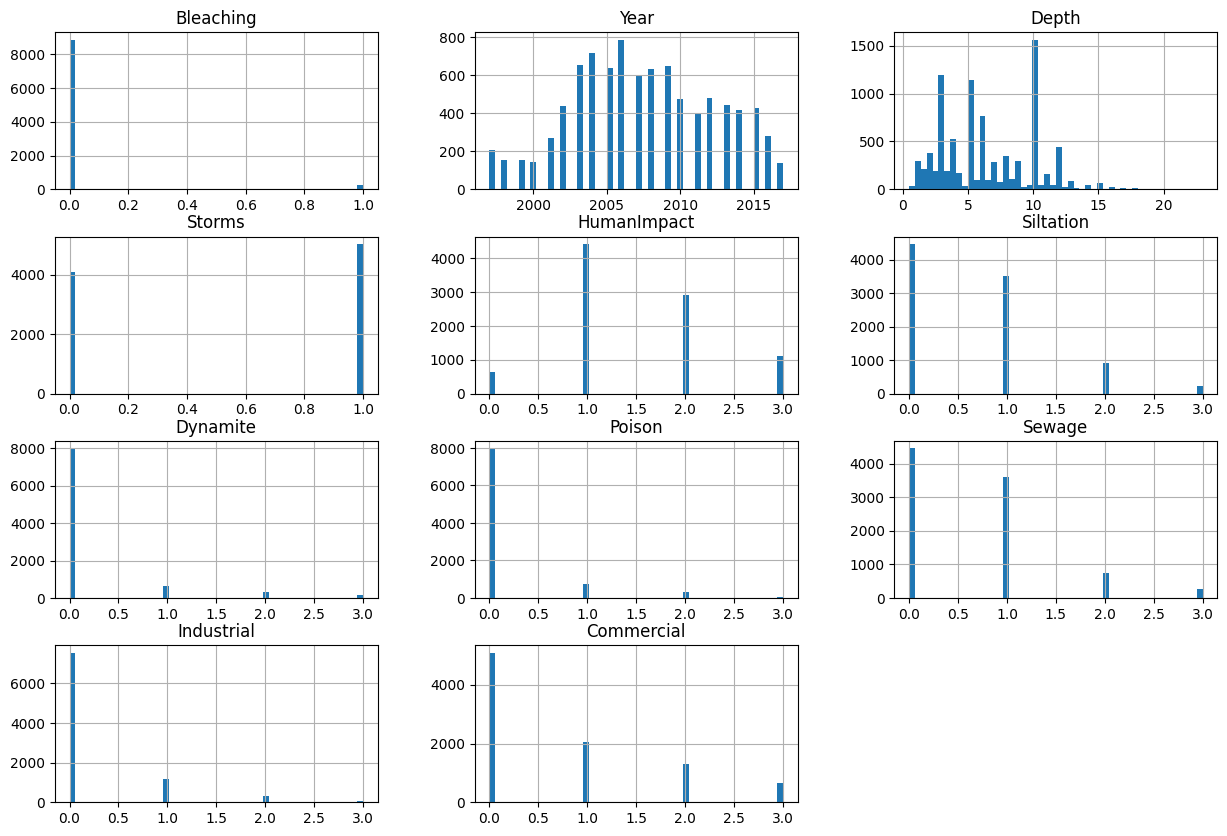

In [19]:
df.hist(bins=50, figsize=(15,10))
plt.show()

Text(0.5, 1.0, 'pearson correlation')

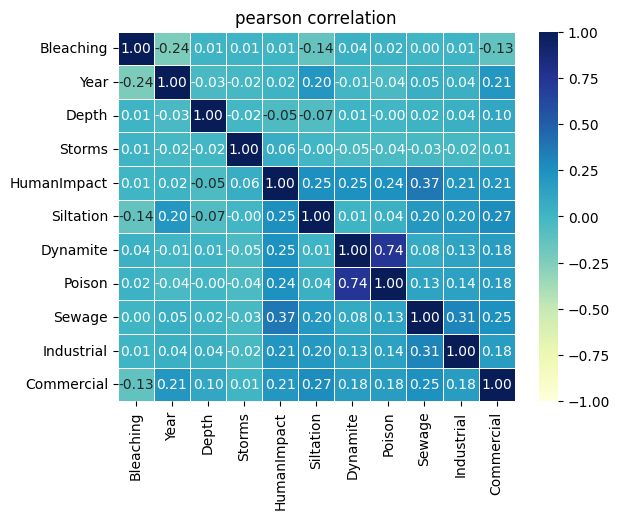

In [34]:
df_NUM = df.drop(['Ocean'], axis = 1)

corr_matrix = df_NUM.corr(method = "pearson")


sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [27]:
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/NOAA_ReefCheck/NOAA_int.csv'
df = pd.read_csv(url)
df.head() 

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,0,Atlantic,2005,4.0,1,3,2,0,0,3,0,0
1,0,Red Sea,2004,6.0,0,3,1,0,0,1,0,0
2,0,Pacific,1998,3.0,0,1,0,0,0,0,1,0
3,0,Pacific,1998,10.0,0,1,0,0,0,0,1,0
4,0,Atlantic,1997,10.0,0,3,0,0,0,3,2,0


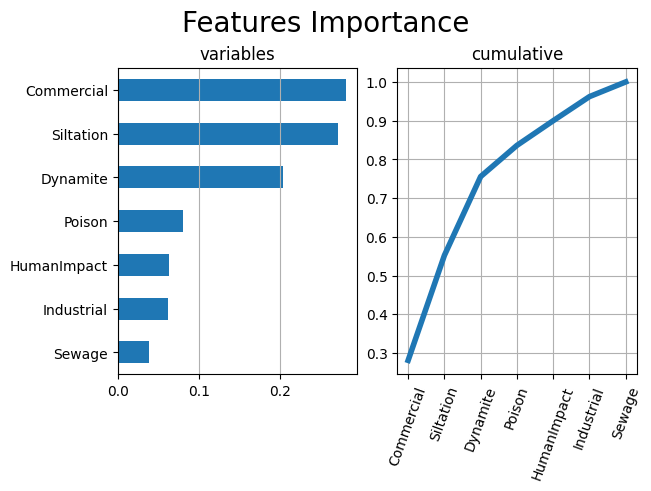

In [30]:
X = df[['HumanImpact','Siltation','Dynamite','Poison','Sewage','Industrial','Commercial']]

y = df["Bleaching"]

feature_names = ['HumanImpact','Siltation','Dynamite','Poison','Sewage','Industrial','Commercial']


## Call model
model = ensemble.GradientBoostingRegressor()

## Importance
model.fit(X,y)
importances = model.feature_importances_

## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, constrained_layout=True)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')

plt.show()


In [40]:
import scipy.stats as stats
# Extract the bleaching data for different oceans
atlantic_bleaching = df[df['Ocean'] == 'Atlantic']['Bleaching']
redsea_bleaching = df[df['Ocean'] == 'Red Sea']['Bleaching']
pacific_bleaching = df[df['Ocean'] == 'Pacific']['Bleaching']

# Perform the one-way ANOVA test
f_stat, p_value = stats.f_oneway(atlantic_bleaching, redsea_bleaching, pacific_bleaching)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 0.1686330463616358
P-value: 0.8448218104327515


In [46]:
target = "Bleaching"
features = ["Year", "Depth", "Storms", "HumanImpact", "Siltation", "Dynamite", "Poison", "Sewage", "Industrial", "Commercial"]

# Lists to store results
correlated_results = []
non_correlated_results = []

# Loop through each feature and perform ANOVA
for feature in features:
    model = smf.ols(f'{target} ~ {feature}', data=df).fit()
    table = sm.stats.anova_lm(model)
    p_value = table["PR(>F)"][0]
    conclusion = "Correlated" if p_value < 0.05 else "Non-Correlated"
    if conclusion == "Correlated":
        correlated_results.append((feature, round(p_value, 3), conclusion))
    else:
        non_correlated_results.append((feature, round(p_value, 3), conclusion))

# Print the correlated results first
print("Correlated Features:")
for feature, p_value, conclusion in correlated_results:
    print(f"ANOVA F: The variables {target} and {feature} are {conclusion} (p-value: {p_value})")

# Print the non-correlated results next
print("\nNon-Correlated Features:")
for feature, p_value, conclusion in non_correlated_results:
    print(f"ANOVA F: The variables {target} and {feature} are {conclusion} (p-value: {p_value})")


Correlated Features:
ANOVA F: The variables Bleaching and Year are Correlated (p-value: 0.0)
ANOVA F: The variables Bleaching and Siltation are Correlated (p-value: 0.0)
ANOVA F: The variables Bleaching and Dynamite are Correlated (p-value: 0.0)
ANOVA F: The variables Bleaching and Poison are Correlated (p-value: 0.017)
ANOVA F: The variables Bleaching and Commercial are Correlated (p-value: 0.0)

Non-Correlated Features:
ANOVA F: The variables Bleaching and Depth are Non-Correlated (p-value: 0.355)
ANOVA F: The variables Bleaching and Storms are Non-Correlated (p-value: 0.355)
ANOVA F: The variables Bleaching and HumanImpact are Non-Correlated (p-value: 0.59)
ANOVA F: The variables Bleaching and Sewage are Non-Correlated (p-value: 0.934)
ANOVA F: The variables Bleaching and Industrial are Non-Correlated (p-value: 0.353)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_43868\3965170258.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = table["PR(>F)"][0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_43868\3965170258.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = table["PR(>F)"][0]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_43868\3965170258.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = table["PR(>F)"][0]
C:\U

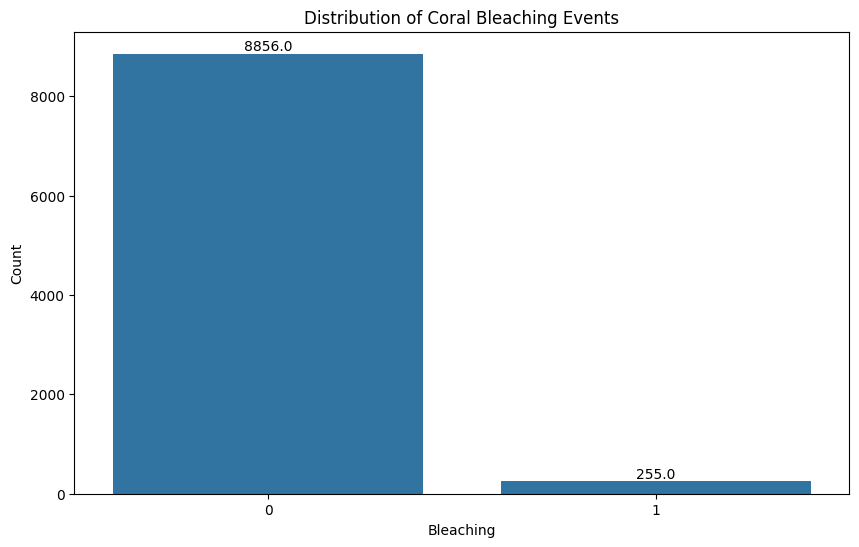

In [50]:

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Bleaching', data=df)
plt.title('Distribution of Coral Bleaching Events')
plt.xlabel('Bleaching')
plt.ylabel('Count')

# Annotate the counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


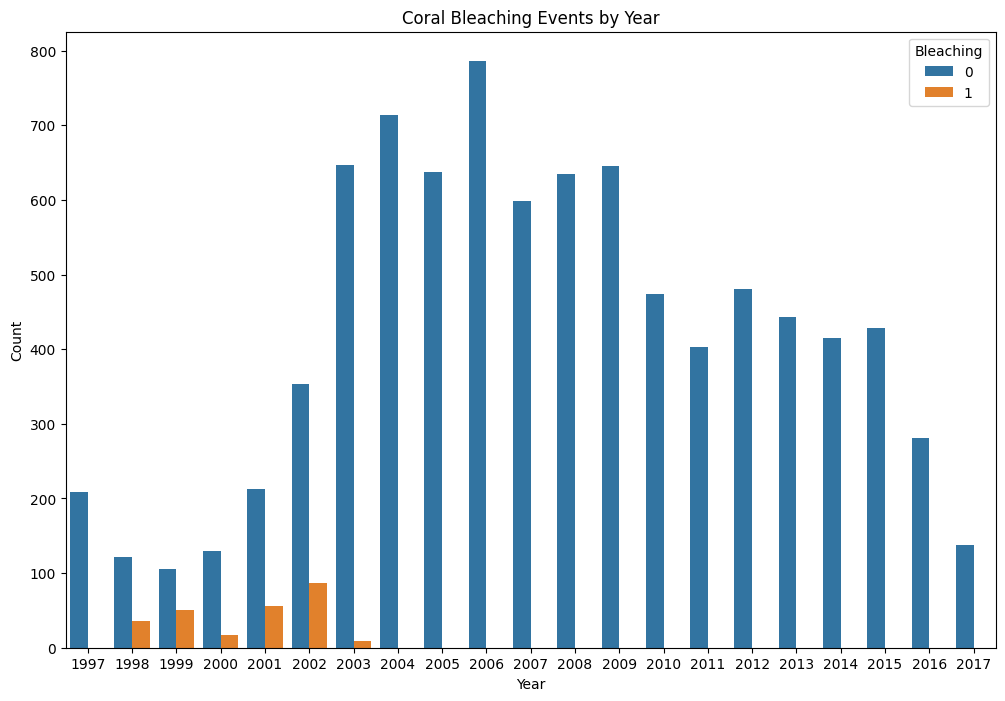

In [52]:
# Plot the number of bleaching events over the years
plt.figure(figsize=(12, 8))
sns.countplot(x='Year', hue='Bleaching', data=df)
plt.title('Coral Bleaching Events by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Bleaching', loc='upper right')
plt.show()


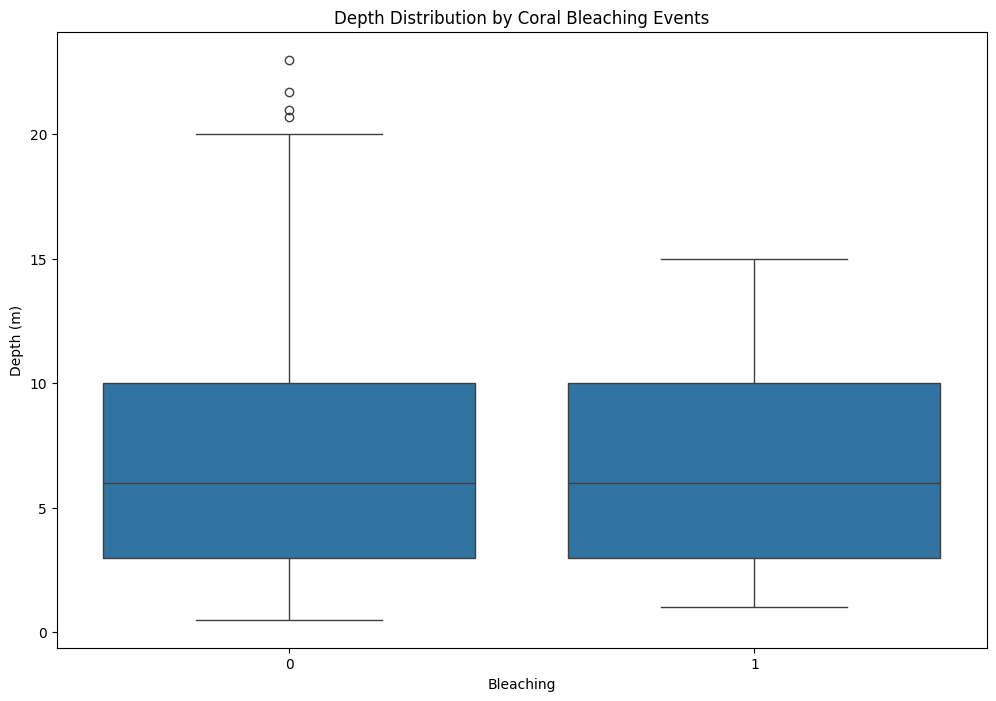

In [54]:
# Plot depth distribution by bleaching events
plt.figure(figsize=(12, 8))
sns.boxplot(x='Bleaching', y='Depth', data=df)
plt.title('Depth Distribution by Coral Bleaching Events')
plt.xlabel('Bleaching')
plt.ylabel('Depth (m)')
plt.show()


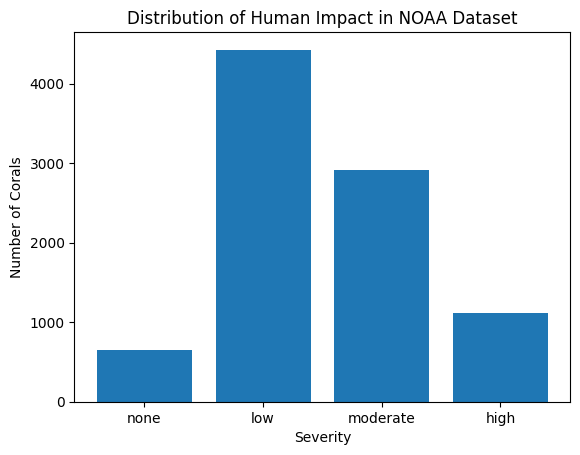

In [58]:
# Counting the numbers of none, low, moderate, and high entries
HInone = df[df['HumanImpact']==0]['HumanImpact'].count()
HIlow = df[df['HumanImpact']==1]['HumanImpact'].count()
HImoderate = df[df['HumanImpact']==2]['HumanImpact'].count()
HIhigh = df[df['HumanImpact']==3]['HumanImpact'].count()
     

desc = ['none', 'low', 'moderate', 'high']
data = [HInone, HIlow, HImoderate, HIhigh]

plt.bar(desc, data)
plt.title('Distribution of Human Impact in NOAA Dataset')
plt.xlabel('Severity')
plt.ylabel('Number of Corals')
plt.show()